# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)
* [Number of significative periodic models for a range of thresholds](#nb_rhythmic_proteins_range_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_range_threshold_pval)
    * [Considering q-values](#nb_rhythmic_proteins_range_threshold_qval)

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [3]:
df_periodic_pval = pd.read_csv("data/Cosinor/cosinor_periodic_pval/cosinor_periodic_pval_concat_serie.csv")
df_periodic_qval = pd.read_csv("data/Cosinor/cosinor_periodic_qval/cosinor_periodic_qval_concat_serie.csv")

print(f"After the cosinor analysis, we obtain {len(df_periodic_pval)} significative models based on a p-value threshold")
print(f"After the cosinor analysis, we obtain {len(df_periodic_qval)} significative models based on a q-value threshold")


After the cosinor analysis, we obtain 11110 significative models based on a p-value threshold
After the cosinor analysis, we obtain 6277 significative models based on a q-value threshold


# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [26]:
Range_period =  [20.5, 20.6, 20.7, 20.8, 20.9, 21, 21.1, 21.2, 21.3, 21.4, 21.5, 23.5, 23.6, 23.7, 23.8, 23.9, 24, 24.1, 24.2, 24.3, 24.4, 24.5]
rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])
dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_pval)):
        [name, cond] = df_periodic_pval['test'].iloc[i].split('/')
        if df_periodic_pval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_pval['period'].iloc[i])
        if df_periodic_pval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_pval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period.sort_values(by="nb_prots_ctrl"))
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_pval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

    Period nb_prots_ctrl nb_prots_nlrp3
19    24.3           254            227
18    24.2           254            228
17    24.1           254            228
16    24.0           255            224
15    23.9           255            225
20    24.4           258            230
14    23.8           258            223
21    24.5           259            234
13    23.7           260            226
11    23.5           262            222
12    23.6           264            225
7     21.2           303            213
6     21.1           304            217
8     21.3           304            215
9     21.4           306            216
10    21.5           307            216
5     21.0           309            218
2     20.7           311            220
3     20.8           312            222
4     20.9           313            220
1     20.6           314            217
0     20.5           315            213


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

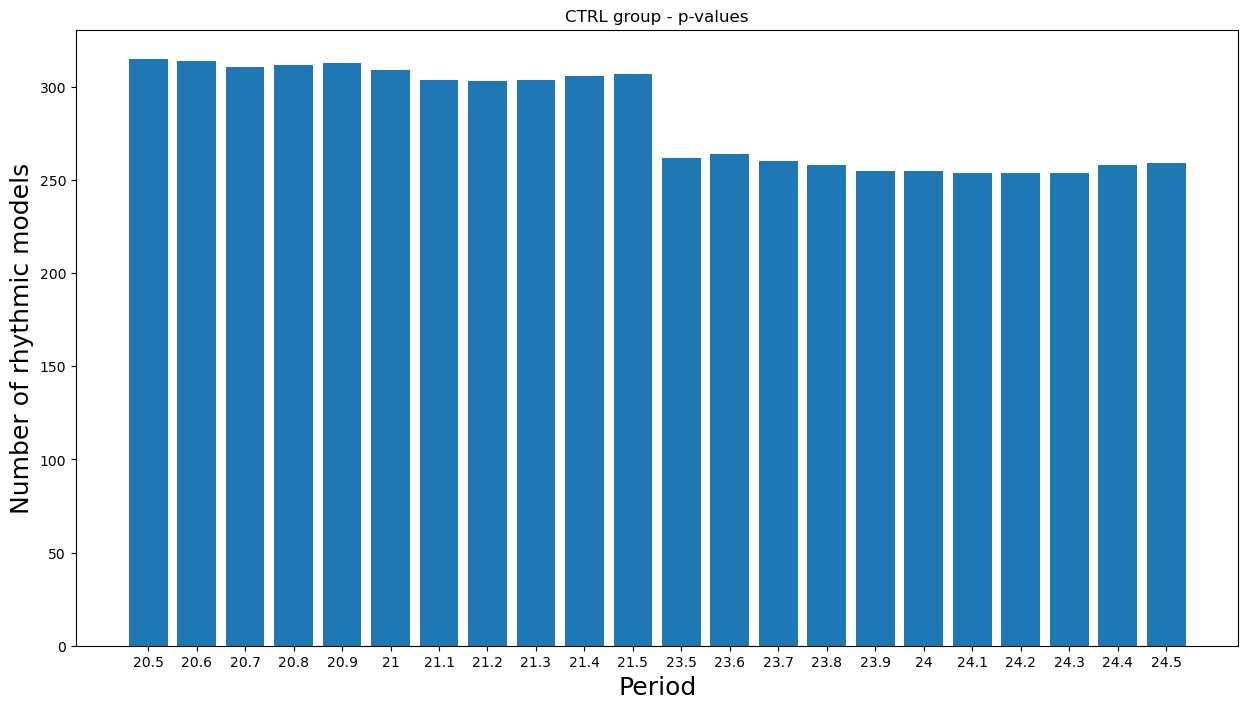

In [17]:
plt.figure(1)
figure(figsize=(25, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21", "21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6",
          "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_ctrl
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

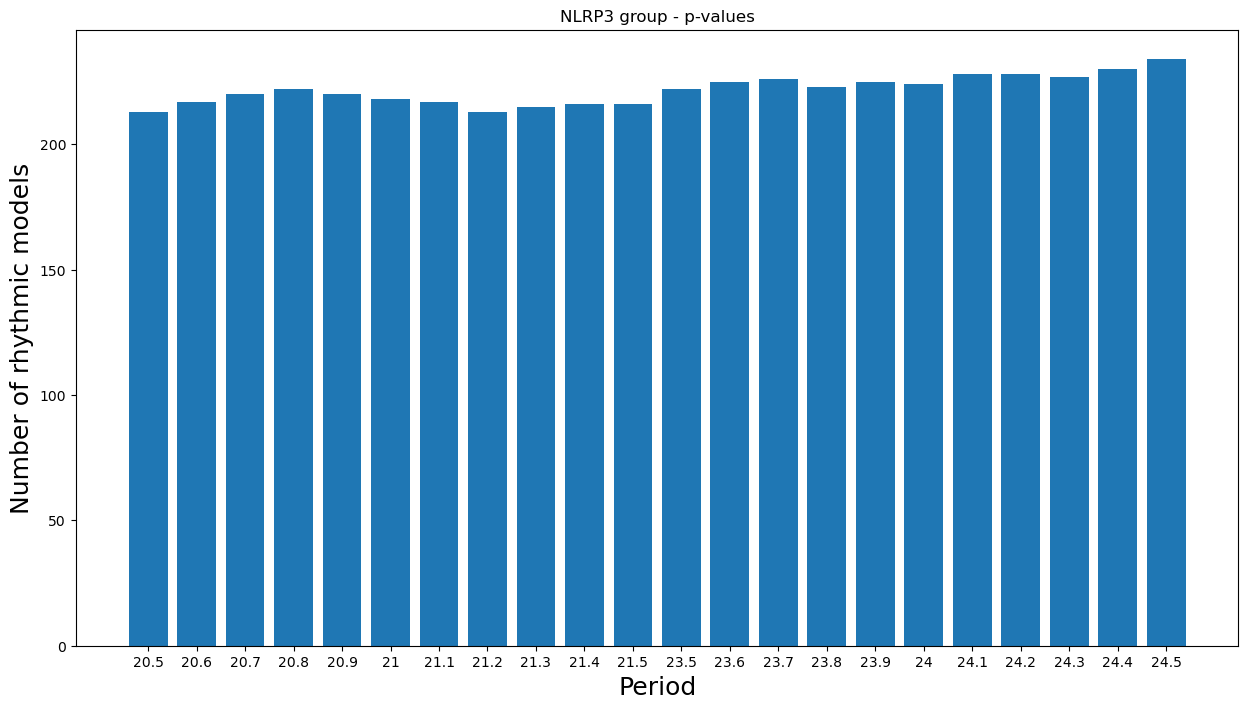

In [18]:
plt.figure(2)
figure(figsize=(10, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21", "21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6",
          "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_pr
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [4]:
Range_period =  [20.5, 20.6, 20.7, 20.8, 20.9, 21, 21.1, 21.2, 21.3, 21.4, 21.5, 23.5, 23.6, 23.7, 23.8, 23.9, 24, 24.1, 24.2, 24.3, 24.4, 24.5]

rhythm_prots_period = pd.DataFrame(columns=['Period','nb_prots_ctrl','nb_prots_nlrp3'])

dataset_histo_ctrl = []
dataset_histo_nlrp3 = []

for period in Range_period :
    new_row = {"Period" : [period]}
    nb_prots_ctrl = 0
    nb_prots_nlrp3 = 0
    for i in range(len(df_periodic_qval)):
        [name, cond] = df_periodic_qval['test'].iloc[i].split('/')
        if df_periodic_qval['period'].iloc[i] == period and cond == "ctrl" :
            nb_prots_ctrl = nb_prots_ctrl+1 
            dataset_histo_ctrl.append(df_periodic_qval['period'].iloc[i])
        if df_periodic_qval['period'].iloc[i] == period and cond == "nlrp3" :
            nb_prots_nlrp3 = nb_prots_nlrp3+1
            dataset_histo_nlrp3.append(df_periodic_qval['period'].iloc[i])
    new_row.update({"nb_prots_ctrl" : [nb_prots_ctrl]})
    new_row.update({"nb_prots_nlrp3" : [nb_prots_nlrp3]})
    new_row = pd.DataFrame(new_row)
    rhythm_prots_period = pd.concat([rhythm_prots_period,new_row], ignore_index=True)

print(rhythm_prots_period)
filepath = os.path.join("data/Cosinor", 'rhythm_prots_period_qval.csv')
rhythm_prots_period.to_csv(filepath,index=False) 

    Period nb_prots_ctrl nb_prots_nlrp3
0     20.5           145            116
1     20.6           147            116
2     20.7           149            118
3     20.8           149            119
4     20.9           151            121
5     21.0           152            122
6     21.1           152            122
7     21.2           152            122
8     21.3           152            122
9     21.4           153            123
10    21.5           153            123
11    23.5           168            131
12    23.6           168            131
13    23.7           168            131
14    23.8           168            132
15    23.9           168            133
16    24.0           168            133
17    24.1           168            132
18    24.2           169            132
19    24.3           168            132
20    24.4           167            132
21    24.5           167            132


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

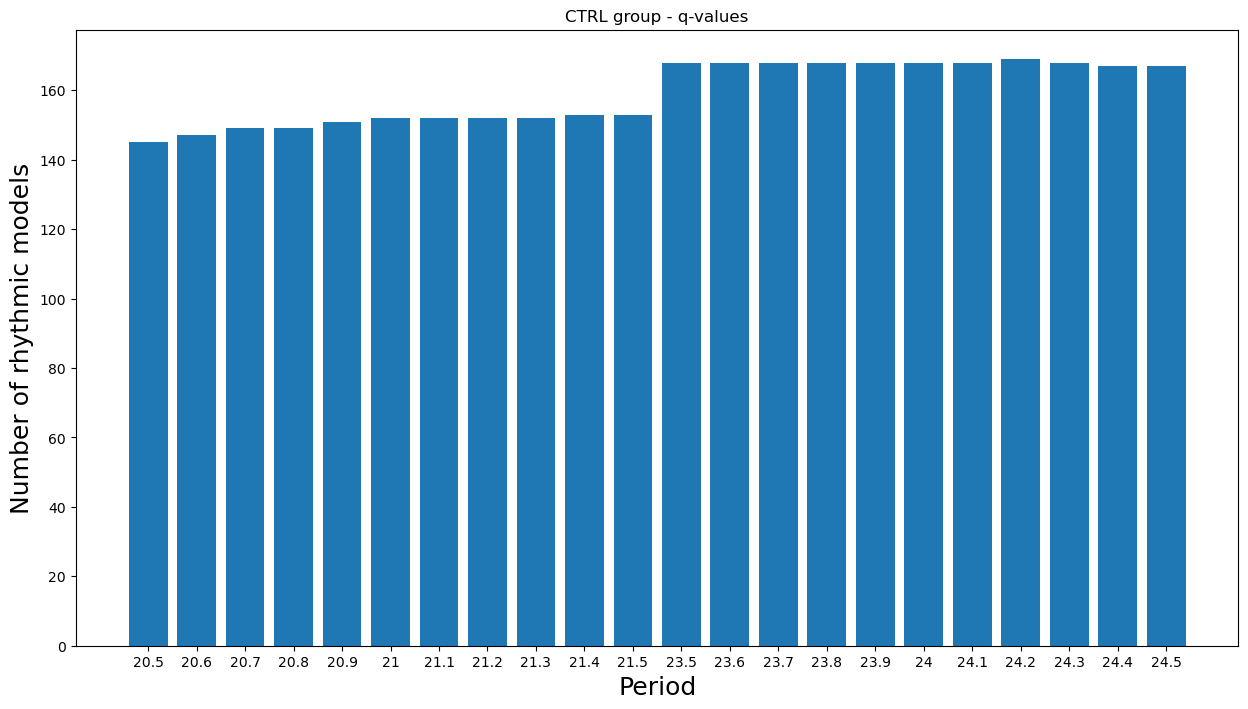

In [23]:
plt.figure(1)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21", "21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6",
          "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_ctrl
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

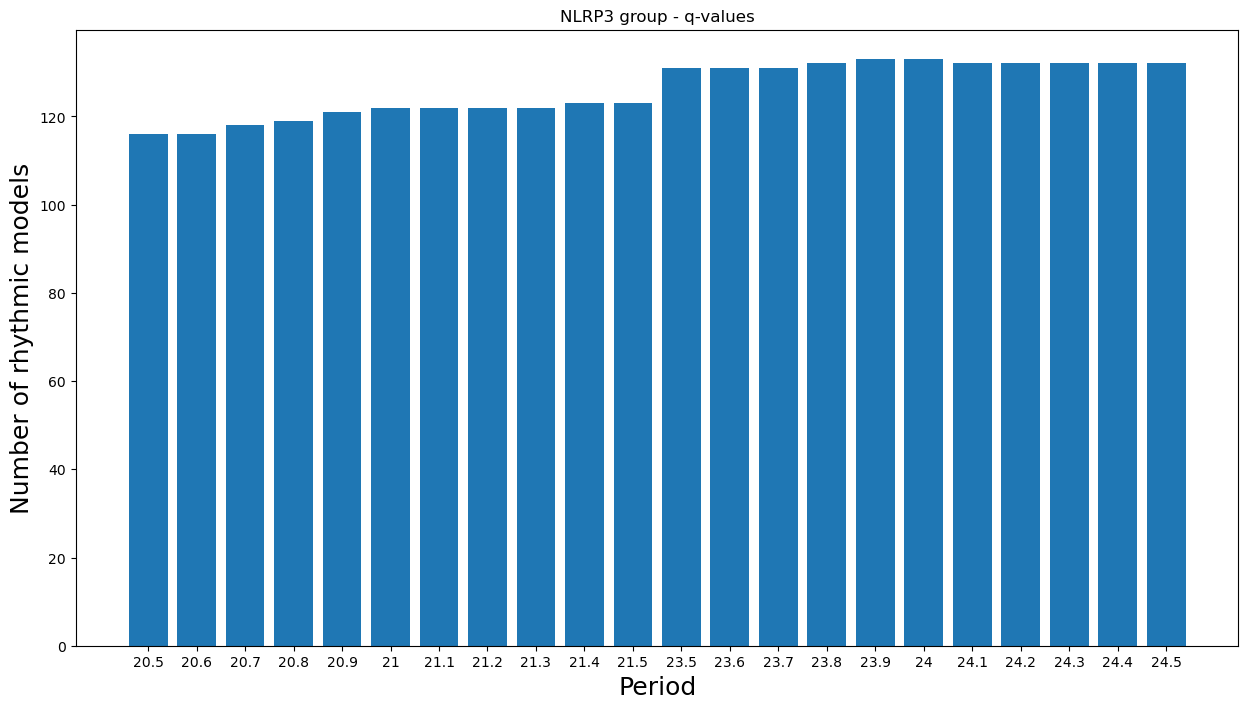

In [24]:
plt.figure(2)
figure(figsize=(15, 8))
labels = ["20.5", "20.6", "20.7", "20.8", "20.9", "21", "21.1", "21.2", "21.3", "21.4", "21.5", "23.5", "23.6",
          "23.7", "23.8", "23.9", "24", "24.1", "24.2", "24.3", "24.4", "24.5"]
counts = rhythm_prots_period.nb_prots_nlrp3
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_mass_spec_cosinor_nlrp3_qval.png', dpi = 300)
